In [8]:
import numpy as np
import pandas as pd
import random
import math
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2, norm, expon
from scipy.stats import kstest
from scipy.stats import distributions
from scipy import  stats
from shapely.geometry import Point, Polygon
import pandas as pd
import json
from shapely.geometry import Point
import warnings

from scipy.stats import uniform, expon

from matplotlib import pyplot as plt
import simpy

## Ejercicio 1
A partir del universo de página webs provistas junto al enunciado, se pide:
* Calcular el pagerank para cada sitio. (Mostrar la matriz generada)
* Simular 20 búsquedas de palabras elegidas al azar dentro de las existentes en los textos de las páginas, y
mostrar las mismas en función de la importancia asignada a cada sitio.

Para construir la matriz vamos a tener en cuenta dos casos:
1) Si el sitio actual referencia a otros sitios, todos los sitios referenciados tendrán la misma probabilidad de ser visitados en el próximo instante de tiempo.
2) Si el sitio actual no referencia a ningun otro sitio, todos los sitios en su totalidad tendrán la misma probabilidad de ser visitados en el próximo instante de tiempo.

A partir de esto, podemos construir la matriz que nos ayuda a comprender el comportamiento en cuestión.
Cada sitio está representado como un posible estado (nodo del grafo) siguiendo la siguiente convención:
* Estado 0: Angelina Jolie
* Estado 1: Brad Pitt
* Estado 2: Jennifer Aniston
* Estado 3: Jon Voight
* Estado 4: Martin Scorcese
* Estado 5: Robert De Niro

\begin{equation}
P = 
\begin{bmatrix}
0 & 1/2 & 0 & 1/2 & 0 & 0\\
1/2 & 0 & 1/4 & 0 & 1/4 & 0\\
1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
2/3 & 1/3 & 0 & 0 & 0 & 0\\
1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
0 & 0 & 0 & 0 & 1 & 0\\
\end{bmatrix}
\end{equation}

Luego, para calcular el pagerank de cada sitio vamos a buscar el estado estacionario de la cadena de Markov que a su vez representa la fracción de tiempo que estamos en cada estado.

Primero nos aseguramos que converge, para ello chequeamos los autovalores:

In [ ]:
p = np.array([ [0,1/2,0,1/2,0,0],
               [1/2,0,1/4,0,1/4,0],
              [1/6,1/6,1/6,1/6,1/6,1/6],
              [2/3,1/3,0,0,0,0],
              [1/6,1/6,1/6,1/6,1/6,1/6],
              [0,0,0,0,1,0]
             ])

avas,avec = np.linalg.eig(p)
print("Autovalores: \nλ1= {}\nλ2= {}\nλ3= {}\nλ4= {}\nλ5= {}\nλ6= {}\n".format(avas[0], avas[1],avas[2],avas[3],avas[4],avas[5]))

Autovalores: 
λ1= 1.0
λ2= 0.45424145588351783
λ3= -0.6873305299176353
λ4= -0.26691092596588245
λ5= -5.551115123125783e-17
λ6= -0.16666666666666657



Como podemos ver, a excepción de λ1 que es igual a 1, para los demás autovalores se cumple que son menores a 1 en valor absoluto. Esto es una condiciń suficiente para poder afirmar que hay convergencia.

Un camino posible es plantear

$$
\begin{equation}
[\pi_1,\pi_2,\pi_3,\pi_4,\pi_5,\pi_6] * 
\begin{bmatrix}
0 & 1/2 & 0 & 1/2 & 0 & 0\\
1/2 & 0 & 1/4 & 0 & 1/4 & 0\\
1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
2/3 & 1/3 & 0 & 0 & 0 & 0\\
1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
0 & 0 & 0 & 0 & 1 & 0\\
\end{bmatrix}
= [\pi_1,\pi_2,\pi_3,\pi_4,\pi_5,\pi_6]
\end{equation}
$$

De modo que queda resolver el siguiente sistema de ecuaciones:

$
\pi_1 = \frac{1}{2}\pi_2 + \frac{1}{6}\pi_3 + \frac{2}{3}\pi_4 + \frac{1}{6}\pi_5\\
\pi_2 = \frac{1}{2}\pi_1 + \frac{1}{6}\pi_3 + \frac{1}{3}\pi_4 + \frac{1}{6}\pi_5\\
\pi_3 = \frac{1}{4}\pi_2 + \frac{1}{6}\pi_3 + \frac{1}{6}\pi_5\\
\pi_4 = \frac{1}{2}\pi_1 + \frac{1}{6}\pi_3 + \frac{1}{6}\pi_5\\
\pi_5 = \frac{1}{4}\pi_2 + \frac{1}{6}\pi_3 + \frac{1}{6}\pi_5 + \pi_6elif (self.estado = 1) self.actualizarDesdeEstadoUno(x)\\ 
\pi_6 = \frac{1}{6}\pi_3 + \frac{1}{6}\pi_5\\
1 = \pi_1 + \pi_2 + \pi_3 + \pi_4 + \pi_5 + \pi_6
$

In [ ]:
A = np.array([ [-1,1/2,1/6,2/3,1/6,0],
               [1/2,-1,1/6,1/3,1/6,0],
              [0,1/4,-5/6,0,1/6,0],
              [1/2,0,1/6,-1,1/6,0],
              [0,1/4,1/6,0,-5/6,1],
              [1,1,1,1,1,1]
             ])
b = np.array([0, 0, 0, 0, 0,1])
x = np.linalg.solve(A, b)

print("Estado estacionario:\nπ1= {}\nπ2= {}\nπ3= {}\nπ4= {}\nπ5= {}\nπ6= {}".format(x[0],x[1],x[2],x[3],x[4],x[5]))

Estado estacionario:
π1= 0.2857142857142857
π2= 0.24489795918367344
π3= 0.10204081632653059
π4= 0.18367346938775508
π5= 0.1428571428571429
π6= 0.040816326530612346


Por otro lado, si elevamos la matriz P a un numero lo suficientemente grande, deberíamos observar que aparecen estos valores en las columnas. Comprobemoslo

In [ ]:
result = np.linalg.matrix_power(p, 50)
result

array([[0.28571429, 0.24489796, 0.10204082, 0.18367347, 0.14285714,
        0.04081633],
       [0.28571428, 0.24489796, 0.10204082, 0.18367347, 0.14285714,
        0.04081633],
       [0.28571429, 0.24489796, 0.10204082, 0.18367347, 0.14285714,
        0.04081633],
       [0.28571428, 0.24489796, 0.10204082, 0.18367347, 0.14285714,
        0.04081633],
       [0.28571429, 0.24489796, 0.10204082, 0.18367347, 0.14285714,
        0.04081633],
       [0.28571429, 0.24489796, 0.10204082, 0.18367347, 0.14285714,
        0.04081633]])

Efectivamente se cumple. Entonces, el page rank queda:

In [ ]:
page_rank = pd.DataFrame(data={'Id':[0,1,3,4,2,5],'Nombre':['Angelina Jolie','Brad Pitt','Jon Voight','Martin Scorcese','Jennifer Aniston','Robert De Niro']}) 
page_rank

,Id,Nombre
0,0,Angelina Jolie
1,1,Brad Pitt
2,3,Jon Voight
3,4,Martin Scorcese
4,2,Jennifer Aniston
5,5,Robert De Niro


In [ ]:
class CadenaMarkov:
    def __init__(self,estado_inicial):
        self.estado = estado_inicial

    def next(self):
        x = np.random.uniform(0,1,1)[0]
        if (self.estado == 0): self.estado = self.actualizarDesdeEstadoCero(x)
        elif (self.estado == 1): self.estado = self.actualizarDesdeEstadoUno(x)
        elif (self.estado == 2): self.estado = self.actualizarDesdeEstadoDos(x)
        elif (self.estado == 3): self.estado = self.actualizarDesdeEstadoTres(x)
        elif (self.estado == 4): self.estado = self.actualizarDesdeEstadoCuatro(x)
        elif (self.estado == 5): self.estado = self.actualizarDesdeEstadoCinco(x)
        
    def actualizarDesdeEstadoCero(self,x):
        if (x < 1/2): return 1
        return 3
    
    def actualizarDesdeEstadoUno(self,x):
        if (x < 1/2): return 0
        elif (x < 3/4): return 2
        return 4
    
    def actualizarDesdeEstadoDos(self,x):
        if (x < 1/6): return 0
        elif (x < 2/6): return 1
        elif (x < 3/6): return 2
        elif (x < 4/6): return 3
        elif (x < 5/6): return 4
        return 5
    
    def actualizarDesdeEstadoTres(self,x):
        if (x < 2/3): return 0
        return 1
    
    def actualizarDesdeEstadoCuatro(self,x):
        if (x < 1/6): return 0
        elif (x < 2/6): return 1
        elif (x < 3/6): return 2
        elif (x < 4/6): return 3
        elif (x < 5/6): return 4
        return 5
    
    def actualizarDesdeEstadoCinco(self,x):
        return 4

* Elegir palabra
* 

In [ ]:
sitio0 = "Angelina Jolie (born Angelina Jolie Voight; June 4, 1975) is an American actress and Goodwill Ambassador for the UN Refugee Agency. She has received three Golden Globe Awards, two Screen Actors Guild Awards, and an Academy Award. Jolie has promoted humanitarian causes throughout the world, and is noted for her work with refugees through UNHCR. She has been cited as one of the world's most beautiful women and her off-screen life is widely reported.[1] Though she made her screen debut as a child alongside her father Jon Voight in the 1982 film Lookin' to Get Out, Jolie's acting career began in earnest a decade later with the low-budget production Cyborg 2 (1993). Her first leading role in a major film was in Hackers (1995). She starred in the critically acclaimed biographical films George Wallace (1997) and Gia (1998), and won an Academy Award for Best Supporting Actress for her performance in the drama Girl, Interrupted (1999). Jolie achieved wider fame after her portrayal of video game heroine Lara Croft in Lara Croft: Tomb Raider (2001), and since then has established herself as one of the best-known and highest-paid actresses in Hollywood.[2] She has had her biggest commercial successes with the action-comedy Mr. & Mrs. Smith (2005) and the animated film Kung Fu Panda (2008).[3] Divorced from actors Jonny Lee Miller and Billy Bob Thornton, Jolie currently lives with actor Brad Pitt, in a relationship that has attracted worldwide media attention. Jolie and Pitt have three adopted children, Maddox, Pax, and Zahara, as well as three biological children, Shiloh, Knox, and Vivienne.".replace('.','').replace(',', '').split(" ")
sitio1 = "William Bradley 'Brad' Pitt[1] (born December 18, 1963) is an American actor and film producer. He has been cited as one of the world's most attractive men, a label that entices the media to report on his off-screen life.[2][3] Pitt has received two Academy Award nominations and four Golden Globe Award nominations, winning one. Pitt began his acting career with television guest appearances, which included a role on the CBS soap opera Dallas in 1987. He gained recognition as the cowboy hitchhiker who seduces Geena Davis's character in the 1991 road movie Thelma & Louise. Pitt's first leading roles in big-budget productions came with A River Runs Through It (1992) and Interview with the Vampire (1994). He was cast opposite Anthony Hopkins in the 1994 drama Legends of the Fall, which earned him his first Golden Globe nomination. In 1995, he gave critically acclaimed performances in the crime thriller Seven and the science fiction film Twelve Monkeys, the latter earning him a Golden Globe Award for Best Supporting Actor and an Academy Award nomination. Four years later in 1999, Pitt starred in the cult hit Fight Club. Subsequently in 2001, he starred in the major international hit Ocean's Eleven and its sequels Ocean's Twelve (2004) and Ocean's Thirteen (2007). He has had his biggest commercial successes with Troy (2004) and Mr. & Mrs. Smith (2005). Pitt received his second Academy Award nomination for his performance in the title role in the 2008 film The Curious Case of Benjamin Button. Following a high-profile relationship with actress Gwyneth Paltrow, Pitt was married to actress Jennifer Aniston for five years. As of 2009, he lives with actress Angelina Jolie in a relationship that has attracted worldwide media attention.[4] He and Jolie have three adopted children, Maddox, Zahara, and Pax, and have also given birth to three biological children, Shiloh, Knox, and Vivienne. Pitt owns a production company named Plan B Entertainment, which produced the 2007 Academy Award winner for Best Picture, Martin Scorcese's The Departed, among other films. Since beginning his relationship with Jolie, he has become increasingly involved in social issues, both in the United States and internationally.".replace('.','').replace(',', '').split(" ")
sitio2 = "Jennifer Joanna Aniston (born February 11, 1969) is an American actress. She became famous in the 1990s for her role as Rachel Green in the US sitcom Friends, a role for which she won an Emmy Award, a Golden Globe Award, and a Screen Actors Guild Award. She has starred in several Hollywood films. While most of her film roles have been in comedies such as Bruce Almighty, Office Space, Rumor Has It, and the romantic comedies Along Came Polly and The Break-Up, she has also appeared in films from other genres, such as the comedy-horror Leprechaun and the crime thriller Derailed.".replace('.','').replace(',', '').split(" ")
sitio3 = "Jonathan Vincent 'Jon' Voight (born December 29, 1938) is an American film and television actor. He has had a long and distinguished career as both a leading man and, in recent years, a character actor, with an extensive and compelling range. He came to prominence at the end of the 1960s, with a performance as a would-be hustler in 1969's Best Picture winner, Midnight Cowboy, for which he earned his first Academy Award nomination. Throughout the following decades, Voight built his reputation with an array of challenging roles and has appeared in such landmark films as Deliverance (1972), and Coming Home (1978), for which he received an Academy Award for Best Actor. Voight's impersonation of sportscaster/journalist Howard Cosell, in the 2001 biopic Ali, earned Voight critical raves and his fourth Oscar nomination. He has starred in the seventh season of 24 as the villain Jonas Hodges. Voight is the father of actress Angelina Jolie and actor James Haven, as well as brother of singer-songwriter Chip Taylor and geologist Barry Voight. He has six grandchildren by Jolie and her partner Brad Pitt.".replace('.','').replace(',', '').split(" ")
sitio4 = "Martin Marcantonio Luciano Scorsese (born November 17, 1942) is an American film director, screenwriter, producer, actor, and film historian. He is the founder of the World Cinema Foundation and a recipient of the AFI Life Achievement Award for his contributions to the cinema and has won awards from the Oscars, Golden Globe, BAFTA, and Directors Guild of America. Scorsese is president of the Film Foundation, a non-profit organization dedicated to film preservation and the prevention of the decaying of motion picture film stock. Scorsese's body of work addresses such themes as Italian American identity, Roman Catholic concepts of guilt and redemption,[1] machismo, and violence. Scorsese is widely considered to be one of the most significant and influential American filmmakers of his era, directing landmark films such as Taxi Driver, Raging Bull and Goodfellas; all of which he collaborated on with actor Robert De Niro.[2] He earned the Academy Award for Best Director for The Departed and an MFA in film directing from the New York University Tisch School of the Arts.".replace('.','').replace(',', '').split(" ")
sitio5 = "Robert Mario De Niro, Jr. (born August 17, 1943) is an American actor, director, and producer. De Niro is well known for his method acting and portrayals of conflicted, troubled characters and for his enduring collaboration with director Martin Scorsese. He gained critical acclaim in the early 1970s, culminating in his first Academy Award as best Supporting Actor for The Godfather Part II (1974), followed by a Best Actor Academy Award win for Raging Bull (1980). His film roles include the young Vito Corleone in The Godfather Part II, cabbie Travis Bickle in Taxi Driver, boxer Jake LaMotta in Raging Bull, mobster Jimmy Conway in Goodfellas and Jack Byrnes in Meet the Parents and Meet the Fockers.".replace('.','').replace(',', '').split(" ")

palabras_totales = sitio0+sitio1+sitio2+sitio3+sitio4+sitio5

In [ ]:
#Definimos funcion que se encarga de buscar la palabra
def simular_busqueda_palabra(cadena_markov, palabra_buscada):
    #Limitamos a 1000 iteraciones para evitar caer en un loop infinito
    for i in range(0,2000):
        for sitio in [[sitio0,0],[sitio1,1],[sitio2,2],[sitio3,3],[sitio4,4],[sitio5,5]]:
            if (cadena_markov.estado == sitio[1] and palabra_buscada in sitio[0]): return cadena_markov.estado
    
        cadena_markov.next()
        
    print("La palabra no fue encontrada")
    return -1

cantidad_palabras = 20
df_palabras = pd.DataFrame(columns = ['Palabra', 'Estado', 'Estados que la contienen'])
for i in range(0,cantidad_palabras):
    cadena_markov = CadenaMarkov(0)
    palabra_buscada = palabras_totales[np.random.randint(0,len(palabras_totales),1)[0]]

    estado = simular_busqueda_palabra(cadena_markov, palabra_buscada)
    sitios_con_palabra = []
    for sitio in [[sitio0,0],[sitio1,1],[sitio2,2],[sitio3,3],[sitio4,4],[sitio5,5]]:
        if (palabra_buscada in sitio[0]): sitios_con_palabra.append(sitio[1])

    df_palabras.loc[i] = [palabra_buscada, estado, sitios_con_palabra]
    
df_palabras

,Palabra,Estado,Estados que la contienen
0,Oscar,3,[3]
1,School,4,[4]
2,the,0,"[0, 1, 2, 3, 4, 5]"
3,Pitt,0,"[0, 1, 3]"
4,film,0,"[0, 1, 2, 3, 4, 5]"
5,for,0,"[0, 1, 2, 3, 4, 5]"
6,His,5,[5]
7,screen,0,[0]
8,a,0,"[0, 1, 2, 3, 4, 5]"
9,hitchhiker,1,[1]


## Ejercicio 2
En base a lo presentado en el trabajo “Queuing theory application in imaging service analysis for small Earth observation satellites”,
simular los resultados obtenidos sobre la longitud de imágenes en cola esperando ser procesadas en la sección 3.1. Pure image capture service system.
El ejercicio se puede resolver utilizando simpy o programación tradicional (a elección del grupo)

In [24]:
class SimuladorCola:
    def __init__(self, _tasa_arribos, _tasa_servicio, _arribos):
        self.tasa_arribos = _tasa_arribos
        self.tasa_servicio = _tasa_servicio
        self.capacidad_servicio = 1
        self.tiempos = []
        self.request_en_espera = []
        self.arribos_totales = _arribos

    # Dado que las request tienen una prioridad de acuerdo a la mayor oportunidad para capturar
    # la imagen, se asignó una prioridad al azar.
    def simular_prioridad(self):
        return np.random.randint(1,5)

    def generar_arribos_requests(self, env, res):
        arribos = 0
        while arribos < self.arribos_totales:
            yield env.timeout(np.random.exponential(1/self.tasa_arribos)) #
            arribos += 1
            prioridad = self.simular_prioridad()
            print(f"Request {arribos}: Sacar foto con prioridad {prioridad} arribó en tiempo {env.now}")
            env.process(self.servicio_de_captura(env, res, prioridad))

    def servicio_de_captura(self, env, res, prioridad):
        request = res.request(priority=prioridad)
        # Aguarda liberacion del recurso
        yield request
        print(f"Tomando fotografia con prioridad {prioridad}. Inició en tiempo {env.now}")
        yield env.timeout(np.random.exponential(1/self.tasa_servicio))
        print(f"Fin de fotografia con prioridad {prioridad}. Tiempo {env.now}. Quedan en espera {len(res.queue)}")
        #Guardamos datos
        self.tiempos.append(env.now)
        self.request_en_espera.append(len(res.queue))
        # Libera el recurso
        yield res.release(request)

    def simular(self):
        env = simpy.Environment() #Entorno de simpy
        recurso = simpy.PriorityResource(env, capacity=self.capacidad_servicio) #La Cola de prioridad
        env.process(self.generar_arribos_requests(env, recurso))
        env.run()
        return self.tiempos, self.request_en_espera

def grafico_encolados_vs_tiempo(tiempos, cantidad_encolados):
    plt.plot(tiempos, cantidad_encolados, '-')
    plt.title("Longitud de la cola de espera")
    plt.ylabel("Cantidad")
    plt.xlabel("Tiempo(dias)")
    plt.show()

Request 1: Sacar foto con prioridad 2 arribó en tiempo 0.14305855407205184
Tomando fotografia con prioridad 2. Inició en tiempo 0.14305855407205184
Request 2: Sacar foto con prioridad 2 arribó en tiempo 0.21005633746806335
Request 3: Sacar foto con prioridad 4 arribó en tiempo 0.4168461225722468
Fin de fotografia con prioridad 2. Tiempo 0.4631307824616041. Quedan en espera 2
Tomando fotografia con prioridad 2. Inició en tiempo 0.4631307824616041
Fin de fotografia con prioridad 2. Tiempo 0.47409374374140456. Quedan en espera 1
Tomando fotografia con prioridad 4. Inició en tiempo 0.47409374374140456
Request 4: Sacar foto con prioridad 2 arribó en tiempo 0.5412020332384916
Request 5: Sacar foto con prioridad 3 arribó en tiempo 0.5533165702615785
Fin de fotografia con prioridad 4. Tiempo 0.5774278498283361. Quedan en espera 2
Tomando fotografia con prioridad 2. Inició en tiempo 0.5774278498283361
Request 6: Sacar foto con prioridad 3 arribó en tiempo 0.6007933183826771
Request 7: Sacar fot

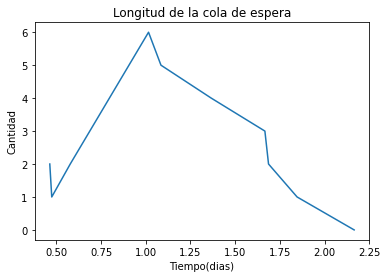

Arribos: 10, Tasa arribo: 10 req/día, Tasa arribo: 5 req/día


In [25]:
tasa_arribos = 10
tasa_servicio = 5
arribos = 10
t, c = SimuladorCola(tasa_arribos, tasa_servicio, arribos).simular()
grafico_encolados_vs_tiempo(t, c)
print(f"Arribos: {arribos}, Tasa arribo: {tasa_arribos} req/día, Tasa arribo: {tasa_servicio} req/día")

Request 1: Sacar foto con prioridad 2 arribó en tiempo 0.039696433732766545
Tomando fotografia con prioridad 2. Inició en tiempo 0.039696433732766545
Request 2: Sacar foto con prioridad 1 arribó en tiempo 0.0624886711534687
Fin de fotografia con prioridad 2. Tiempo 0.08408041820988166. Quedan en espera 1
Tomando fotografia con prioridad 1. Inició en tiempo 0.08408041820988166
Request 3: Sacar foto con prioridad 3 arribó en tiempo 0.13491411583686594
Request 4: Sacar foto con prioridad 4 arribó en tiempo 0.21049537323040707
Request 5: Sacar foto con prioridad 3 arribó en tiempo 0.2897315789877076
Request 6: Sacar foto con prioridad 1 arribó en tiempo 0.3540144293693847
Fin de fotografia con prioridad 1. Tiempo 0.3563570168681233. Quedan en espera 4
Tomando fotografia con prioridad 1. Inició en tiempo 0.3563570168681233
Request 7: Sacar foto con prioridad 2 arribó en tiempo 0.4237451858739255
Request 8: Sacar foto con prioridad 1 arribó en tiempo 0.844026151958184
Request 9: Sacar foto c

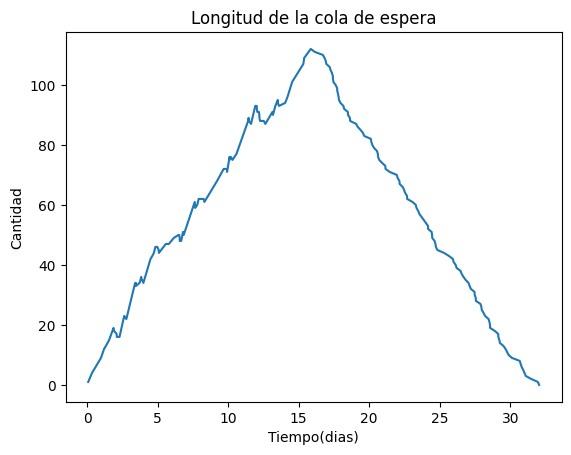

Arribos: 200, Tasa arribo: 12 req/día, Tasa arribo: 7 req/día


In [ ]:
tasa_arribos = 12
tasa_servicio = 7
arribos = 200
t, c = SimuladorCola(tasa_arribos, tasa_servicio, arribos).simular()
grafico_encolados_vs_tiempo(t, c)
print(f"Arribos: {arribos}, Tasa arribo: {tasa_arribos} req/día, Tasa arribo: {tasa_servicio} req/día")



## Ejercicio 3
Se está diseñando un web service, el cual cada vez que es invocado consulta a una base de datos. \\
Se estima que el tiempo que transcurre entre cada llamada al servicio se puede modelar según una distribución exponencial con media de **4 segundos**. \\
Se debe decidir la arquitectura de base de datos a utilizar entre las dos siguientes: \\

1.   Utilizar 2 bases de datos distribuidas. \\
Con probabilidad **p = 0.7** las solicitudes son atendidas por la base 1 y con  probabilidad **q = 1 - p** son atendidos por la base de datos 2. \\
El tiempo que demora cada base de datos en atender una solicitud sigue una distribución exponencial con medias, **0,7 seg** y **1 seg** respectivamente.
2.   Utilizar 1 base de datos central. \\
En este caso la demora en resolver una solicitud sigue una distribución exponencial con **0,8 segundos**.

Simular para cada opción 100.000 solicitudes procesadas, determinando: \\


*   El tiempo medio de espera entre que la solicitud llega y puede ser procesada (suponer que ninguna conexión cae por timeout).
*   La fracción de las solicitudes que no esperaron para ser procesadas.
*   Probar con distintos escenarios, modificando los parámetros del ejercicio.

El ejercicio se puede resolver utilizando Simpy o programación tradicional (a elección del grupo)

In [13]:
class SimuladorBaseDatos:
  def __init__(self, _tasa_arribos, _tasa_servicio_1, _tasa_servicio_2, _arribos):
    self.tasa_arribos = _tasa_arribos
    self.tasa_servicio_1 = _tasa_servicio_1
    self.tasa_servicio_2 = _tasa_servicio_2
    self.capacidad_servicio = 1
    self.tiempos = []
    self.request_en_espera = []
    self.tiempos_de_espera = []
    self.arribos_totales = _arribos

  def generar_arribos_requests(self, env, base1, base2):
    arribos = 0
    while arribos < self.arribos_totales:
      yield env.timeout(np.random.exponential(1/self.tasa_arribos))
      now = env.now
      prob = np.random.uniform()
      if prob < 0.7:
        n = 1
      else:
        n = 2

      print(f"Request {arribos + 1}: Pido datos en tiempo {now} a base {n}")
      self.tiempos_de_espera.append(now)
      
      env.process(self.base_i(arribos, env, base2, n))

      arribos += 1

  def base_i(self, arribo_i, env, res, n):
    request = res.request()
    # Aguarda liberacion del recurso
    yield request

    now = env.now

    #obtengo el tiempo de espera de cada request
    self.tiempos_de_espera[arribo_i] = now - self.tiempos_de_espera[arribo_i]
    print(f"Empiezo a resolver query en base {n}. Inició en tiempo {now}, tiempo de espera {self.tiempos_de_espera[arribo_i]}")

    if n == 1:
      yield env.timeout(np.random.exponential(1/self.tasa_servicio_1))
    else:
      yield env.timeout(np.random.exponential(1/self.tasa_servicio_2))

    print(f"Fin de la query {arribo_i} en base {n}. Tiempo {env.now}. Quedan en espera {len(res.queue)}")
    #Guardamos datos
    self.tiempos.append(env.now)
    self.request_en_espera.append(len(res.queue))
    # Libera el recurso
    yield res.release(request)

  def simular(self):
    env = simpy.Environment()
    base1 = simpy.Resource(env, capacity=self.capacidad_servicio)
    base2 = simpy.Resource(env, capacity=self.capacidad_servicio)
    env.process(self.generar_arribos_requests(env, base1, base2))
    env.run()
    return self.tiempos, self.request_en_espera

def grafico_encolados_vs_tiempo(tiempos, cantidad_encolados):
  plt.plot(tiempos, cantidad_encolados, '-')
  plt.title("Longitud de la cola de espera")
  plt.ylabel("Cantidad")
  plt.xlabel("Tiempo(dias)")
  plt.show()

In [14]:
tasa_arribos = 1/4
tasas_servicio_1 = 1/0.7
tasas_servicio_2 = 1
arribos = 100
t, c = SimuladorBaseDatos(tasa_arribos, tasas_servicio_1, tasas_servicio_2, arribos).simular()

Request 1: Pido datos en tiempo 0.3080779593060078 a base 1
Empiezo a resolver query en base 1. Inició en tiempo 0.3080779593060078, tiempo de espera 0.0
Fin de la query 0 en base 1. Tiempo 0.5773683644870129. Quedan en espera 0
Request 2: Pido datos en tiempo 0.7837800770625616 a base 1
Empiezo a resolver query en base 1. Inició en tiempo 0.7837800770625616, tiempo de espera 0.0
Fin de la query 1 en base 1. Tiempo 1.2769336198762664. Quedan en espera 0
Request 3: Pido datos en tiempo 9.321482074336991 a base 1
Empiezo a resolver query en base 1. Inició en tiempo 9.321482074336991, tiempo de espera 0.0
Fin de la query 2 en base 1. Tiempo 9.402337830621045. Quedan en espera 0
Request 4: Pido datos en tiempo 20.702530628890564 a base 1
Empiezo a resolver query en base 1. Inició en tiempo 20.702530628890564, tiempo de espera 0.0
Request 5: Pido datos en tiempo 23.782319408360593 a base 1
Fin de la query 3 en base 1. Tiempo 23.86365912540448. Quedan en espera 1
Empiezo a resolver query en 

## Ejercicio 4

Una entidad financiera está analizando cambiar uno de sus cajeros automáticos por uno con la funcionalidad de
reciclador de billetes (si un cliente realiza un depósito de efectivo, ese efectivo estará disponible para que lo
pueda retirar otro cliente).
El cajero automático actual, que se quiere reemplazar, es de tipo estándar. No recicla los billetes, sino que
posee dos compartimentos, uno con dinero para entregar y otro donde guarda el dinero que se deposita.
Esto presenta los siguientes problemas:

* Si no tiene más efectivo para entregar en el compartimento de retiro de dinero, no entrega efectivo aunque tenga en el compartimento de depósitos.
* Si el compartimento que recibe los depósitos se completa, no puede recibir más.

La entidad conoce que con el cajero actual el 20% de los clientes se retiraba sin poder extraer dinero, y sólo
acepta cambiarlo si este porcentaje disminuye.

Por simplicidad suponer que el cajero sólo expende billetes de $100, tiene una capacidad máxima de 2000
billetes, y comienza el día con su carga completa.
Si un cliente quiere extraer dinero y el cajero no cuenta con la suma suficiente, se va del mismo sin retirar nada.
Algo similar ocurre cuando un cliente desea depositar efectivo y la capacidad máxima de billetes en el cajero fue
alcanzada, retirándose sin poder depositar.

En el relevamiento que realizó la entidad diferenció a sus clientes en dos grupos:
Grupo 1: Sólo retiran efectivo, y corresponden al 75% de los clientes que arriban.
El tiempo que utilizan el cajero se puede modelar con una distribución exponencial de media 90
segundos.
Cada cliente de este grupo, extrae una cantidad de billetes que sigue una distribución uniforme
[3,50].
Grupo 2: Sólo realizan depósitos, son el 25% de los clientes totales.
Utilizando el cajero un tiempo que siguen una distribución exponencial de media 5 minutos.
Cada cliente de este grupo, deposita una cantidad de billetes que se puede modelar utilizando
una distribución uniforme [10,110].

* a.Simular 1000 días completos de 24 hrs.
* b. Para un día en particular graficar la cantidad de billetes en el cajero luego de cada transacción.
* c. Calcular el tiempo medio que los clientes demoraron en el sistema (espera + utilización del cajero)
* d. ¿Recomienda a la entidad que implemente el cambio de cajero?

In [ ]:
TIEMPO_MIL_DIAS = 60*60*24*1000
TIEMPO_UN_DIA = 60*24
TASA_ARRIBOS_CLIENTE = 1/600

In [ ]:
class ClienteEfectivo:
    def __init__(self):
        #self.tiempoCajero = np.random.exponential(scale=1/TIEMPO_CLIENTE_GRUPO_1) #buscar lo de la exponencial
        self.cantidadRetirada = np.random.uniform(3,50)//1 #buscar lo de la uniforme
    
    def billetesRetirados(self):
        return self.cantidadRetirada
            
class ClienteDeposito:
    def __init__(self):
        #self.tiempoCajero = np.random.exponential(scale=1/TIEMPO_CLIENTE_GRUPO_2) #buscar lo de la exponencial
        self.cantidadDepositada = np.random.uniform(10,110)//1  #buscar lo de la uniforme
        
    def billetesDepositados(self):
        return self.cantidadDepositada

In [ ]:
class SimularCajeroReciclador:
    
    def __init__(self,_tasa_arribos,_tasa_servicio_efectivo, _tasa_servicio_deposito):
        self.cantidadBilletes = 2000
        self.listaBilletes = []
        self.listaBilletes.append(2000)
        self.tasa_arribos = _tasa_arribos
        self.tasa_servicio_efectivo = _tasa_servicio_efectivo
        self.tasa_servicio_deposito = _tasa_servicio_deposito
        self.capacidad_servicio = 1
        self.tiempos = []
        self.request_en_espera = []
        self.arribos = 0
        self.cantidad_clientes_insatisfechos = 0
        
        
                
    def depositar(self,x,env,tasa_servicio):
        if (self.cantidadBilletes + x > 2000):
            print("No se puede realizar el deposito") 
            self.cantidad_clientes_insatisfechos += 1
            
        else:
            self.cantidadBilletes += x
            print("Se realizo el deposito. Dinero restante:" + str(self.cantidadBilletes))
            self.listaBilletes.append(self.cantidadBilletes)
            
            
    def retirar(self,x,env,tasa_servicio):
        print(f"Retirando efectivo. Inició en tiempo {env.now}")
        if (self.cantidadBilletes - x < 0):
            print("No se puede realizar la extraccion")
            self.cantidad_clientes_insatisfechos += 1
        else:
            self.cantidadBilletes -= x
            print("Se realizo el retiro. Dinero restante:" + str(self.cantidadBilletes))
            self.listaBilletes.append(self.cantidadBilletes)
        
    def generar_arribos_requests(self, env, res):
        #tiempo = 0
        while env.now < TIEMPO_UN_DIA:
            prob = random.random()
            yield env.timeout(np.random.exponential(1/self.tasa_arribos))
            self.arribos += 1
            
            if (prob < 0.75):
                print(f"Cliente {self.arribos}:Cliente para retirar arribó en tiempo {env.now}")
                env.process(self.servicio_efectivo(env, res, self.tasa_servicio_efectivo))
        
            else:
                print(f"Cliente {self.arribos}:Cliente para depositar arribó en tiempo {env.now}")
                env.process(self.servicio_deposito(env, res, self.tasa_servicio_deposito))

    def servicio_efectivo(self, env, res,tasa_servicio):
        # Aguarda liberacion del recurso
        request = res.request()
        yield request
        
        nuevoCliente = ClienteEfectivo()
        self.retirar(nuevoCliente.billetesRetirados(),env,tasa_servicio)
        
        yield env.timeout(np.random.exponential(1/tasa_servicio))
        #self.tiempo += env.now
        
        print(f"El cliente retiro. Tiempo {env.now}. Quedan en espera {len(res.queue)}")
        #Guardamos datos
        self.request_en_espera.append(len(res.queue))
        # Libera el recurso
        yield res.release(request)

    def servicio_deposito(self, env, res,tasa_servicio):
        # Aguarda liberacion del recurso
        request = res.request()
        yield request
        
        nuevoCliente = ClienteDeposito()
        self.depositar(nuevoCliente.billetesDepositados(),env,tasa_servicio)
        
        yield env.timeout(np.random.exponential(1/tasa_servicio))
        #self.tiempo += env.now

        print(f"El cliente deposito y se retiro. Tiempo {env.now}. Quedan en espera {len(res.queue)}")
        #Guardamos datos
        self.request_en_espera.append(len(res.queue))
        # Libera el recurso
        yield res.release(request)

    def simular(self):
        env = simpy.Environment() #Entorno de simpy
        recurso = simpy.Resource(env, capacity=self.capacidad_servicio) #La Cola de prioridad
        env.process(self.generar_arribos_requests(env, recurso))
        env.run()
        return self.tiempos, self.request_en_espera


In [ ]:
tasa_arribos = 1/10
TASA_SERVICIO_EFECTIVO = 1/1.5
TASA_SERVICIO_DEPOSITO = 1/5
t, c = SimularCajeroReciclador(tasa_arribos, TASA_SERVICIO_EFECTIVO,TASA_SERVICIO_EFECTIVO).simular()


Cliente 1:Cliente para retirar arribó en tiempo 0.734273802782649
Retirando efectivo. Inició en tiempo 0.734273802782649
Se realizo el retiro. Dinero restante:1986.0
El cliente retiro. Tiempo 1.0691510987289674. Quedan en espera 0
Cliente 2:Cliente para retirar arribó en tiempo 2.8474328876614416
Retirando efectivo. Inició en tiempo 2.8474328876614416
Se realizo el retiro. Dinero restante:1960.0
El cliente retiro. Tiempo 2.99672641975782. Quedan en espera 0
Cliente 3:Cliente para depositar arribó en tiempo 13.866027316004576
No se puede realizar el deposito
Cliente 4:Cliente para retirar arribó en tiempo 16.151799527401817
El cliente deposito y se retiro. Tiempo 17.491795914253778. Quedan en espera 1
Retirando efectivo. Inició en tiempo 17.491795914253778
Se realizo el retiro. Dinero restante:1946.0
El cliente retiro. Tiempo 18.083195897673214. Quedan en espera 0
Cliente 5:Cliente para retirar arribó en tiempo 35.07717027016334
Retirando efectivo. Inició en tiempo 35.07717027016334
Se 

In [ ]:
grafico_encolados_vs_tiempo(t, c)
#print(f"Arribos: {arribos}, Tasa arribo: {tasa_arribos} req/día, Tasa arribo: {tasa_servicio} req/día")

In [ ]:
sns_hist=sns.histplot(data=observaciones,bins=100).set(xlabel="Cantidad de clientes",ylabel="Billetes en el cajero")
plt.show()